<a href="https://colab.research.google.com/github/Dh0t/Tugas/blob/main/PTM8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#get the interactive tools for matplotlib
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [18]:
import nltk

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk # Ensure nltk is imported here as well

# Download necessary NLTK data, including punkt_tab
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    # Add download for punkt_tab
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


# Load data
with open("laptops_test.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Preprocessing
text = text.lower().translate(str.maketrans('', '', string.punctuation))
tokens = word_tokenize(text)
tokens = [word for word in tokens if word not in stopwords.words('english') and word.isalpha()]

# Split into sentences (for Word2Vec training)
sentences = [tokens]  # or use nltk.sent_tokenize for multiple lines

# Train Word2Vec (as GloVe-like embeddings)
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save in GloVe-style format
model.wv.save_word2vec_format("adits.txt", binary=False)

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format("adits.txt", binary=False)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [30]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import os # Import os for path joining

# Construct the path to the input file within the Kaggle environment
# Replace 'your_input_folder' with the actual folder name in /kaggle/input where the file is located
# Replace 'your_glove_filename.txt' with the actual filename of your GloVe vectors
# **REPLACE 'your_actual_input_folder_name' AND 'your_actual_glove_filename.txt'**
glove_input_dir = '/kaggle/input/your_actual_input_folder_name' # **CHANGE THIS** to the actual input folder name
glove_filename = 'your_actual_glove_filename.txt' # **CHANGE THIS** to the actual filename of the vectors
glove_input_file = os.path.join(glove_input_dir, glove_filename)

# Define the output file path within the Kaggle working directory
word2vec_output_file = '/kaggle/working/adit.txt' # Output to working directory

# Konversi format
# Tambahkan penanganan kesalahan untuk memastikan file input ada
try:
    glove2word2vec(glove_input_file, word2vec_output_file)
    print(f"Successfully converted {glove_input_file} to {word2vec_output_file}")
except FileNotFoundError:
    print(f"Error: Input file not found at {glove_input_file}")
    print("Please check the input directory name and filename in the code.")
    # Anda bisa menambahkan langkah-langkah diagnostik di sini,
    # misalnya mencetak isi direktori input:
    # try:
    #     print("Files in input directory:", os.listdir('/kaggle/input'))
    #     print(f"Files in {glove_input_dir}:", os.listdir(glove_input_dir))
    # except Exception as e:
    #     print(f"Could not list directory contents: {e}")


# Load untuk cek
# Pastikan file output ada sebelum mencoba memuatnya
if os.path.exists(word2vec_output_file):
    model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
    print("Model loaded successfully.")
else:
    print("Model could not be loaded because the output file was not created.")

Error: Input file not found at /kaggle/input/your_actual_input_folder_name/your_actual_glove_filename.txt
Please check the input directory name and filename in the code.
Model could not be loaded because the output file was not created.


<ipython-input-30-bef0fe5db8cf>:19: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [31]:
model.most_similar('lenovo')

[('hd', 0.9994227290153503),
 ('windows', 0.9994012713432312),
 ('intel', 0.9993100166320801),
 ('notebook', 0.9992530941963196),
 ('ssd', 0.9992353916168213),
 ('graphics', 0.9992137551307678),
 ('core', 0.9991735816001892),
 ('panel', 0.9991456270217896),
 ('full', 0.9991114139556885),
 ('hp', 0.9990909695625305)]

In [32]:
model.most_similar('hp')

[('intel', 0.9996033310890198),
 ('core', 0.9994504451751709),
 ('notebook', 0.9994222521781921),
 ('hd', 0.9994180798530579),
 ('graphics', 0.999322235584259),
 ('windows', 0.9993138909339905),
 ('flash', 0.999290943145752),
 ('full', 0.9992824196815491),
 ('ssd', 0.9992195963859558),
 ('hdd', 0.9991748332977295)]

In [33]:
model.most_similar(negative='asus')

[('envy', -0.5233567953109741),
 ('omen', -0.5693102478981018),
 ('folio', -0.5767624378204346),
 ('max', -0.7285847067832947),
 ('nitro', -0.7756127119064331),
 ('portégé', -0.7966583371162415),
 ('phantom', -0.7969605922698975),
 ('lifebook', -0.8308044075965881),
 ('vivobook', -0.8453080058097839),
 ('predator', -0.8739420771598816)]

In [34]:
result = model.most_similar(positive=['lenovo','hp'], negative=['asus'])
print("{}:{:.4f}".format(*result[0]))

intel:0.9985


In [35]:
def analogy(x1,x2,y1):
    result = model.most_similar(positive=[y1,x2], negative=[x1])
    return result[0][0]

In [36]:
analogy('dell','lenovo','hp')

'windows'

In [37]:
print(model.doesnt_match("lenovo".split()))

lenovo


In [38]:

def display_pca_scatterplot(model,words=None,sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()),sample)
        else:
            words = [word for word in model.vocab]

    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

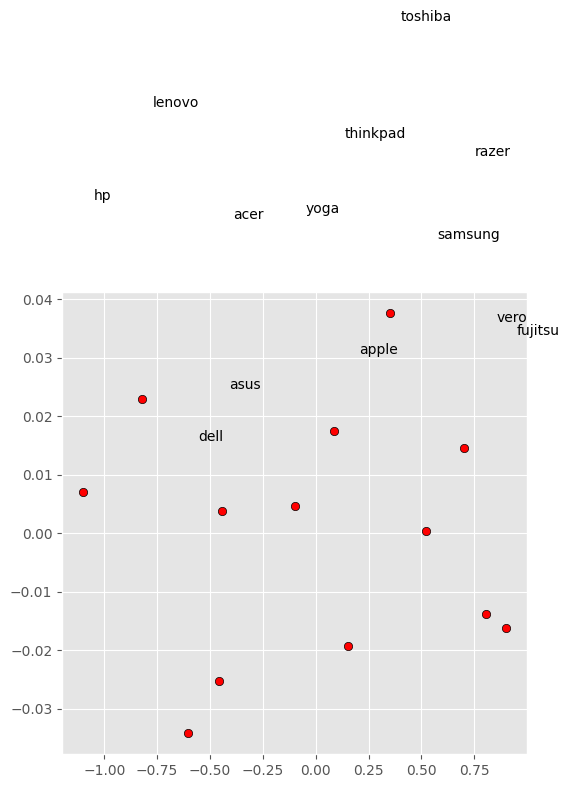

In [45]:
# Check which words from the list are actually in the model's vocabulary
word_list = ['lenovo', 'hp', 'dell', 'asus', 'thinkpad', 'yoga', 'acer', 'apple',
             'fujitsu', 'MSI', 'razer', 'samsung', 'toshiba', 'vero', 'zyrex']

# Get the list of words present in the model's vocabulary
model_vocab = list(model.key_to_index.keys()) # Use .key_to_index for newer gensim versions

# Filter the input list to include only words present in the vocabulary
filtered_words = [word for word in word_list if word in model_vocab]

# Now call the function with the filtered list
display_pca_scatterplot(model, filtered_words)

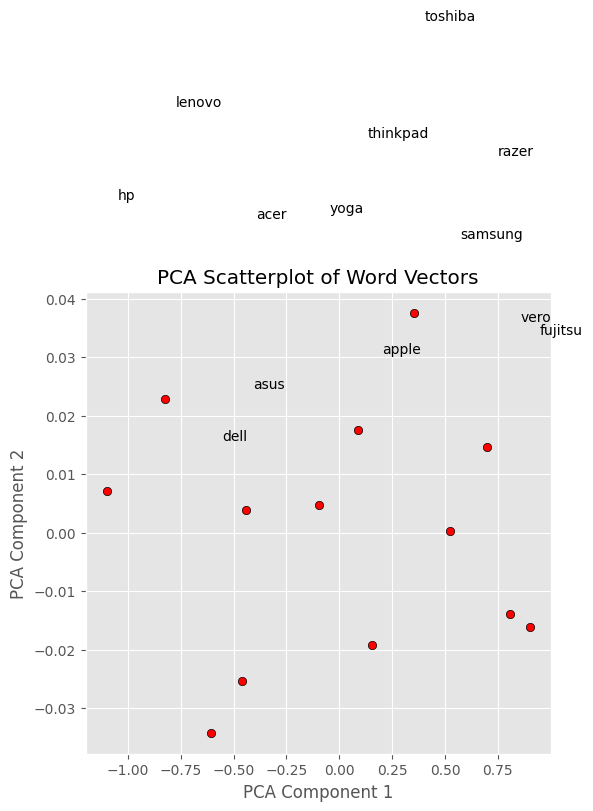

In [51]:
display_pca_scatterplot(model,
                        ['lenovo', 'hp', 'dell', 'asus', 'thinkpad', 'yoga', 'acer', 'apple',
             'fujitsu', 'MSI', 'razer', 'samsung', 'toshiba', 'vero', 'zyrex'])

In [48]:
# Import necessary libraries if not already imported
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors # Make sure KeyedVectors is imported

def display_pca_scatterplot(model: KeyedVectors, words=None, sample=0):
    # Use .index_to_key for newer gensim versions (4.0.0+) to get the list of words
    model_words = list(model.index_to_key)

    if words is None:
        if sample > 0:
            # Choose a random sample from the available words
            if sample > len(model_words):
                print(f"Warning: Sample size ({sample}) is greater than vocabulary size ({len(model_words)}). Using all words.")
                words = model_words
            else:
                words = np.random.choice(model_words, sample, replace=False) # Use replace=False to avoid duplicates in sample
        else:
            # Use all words in the model if no sample is specified
            words = model_words

    # Ensure all selected words are actually in the model's vocabulary
    # Although using model_words should prevent this, it's a good practice
    valid_words = [word for word in words if word in model.key_to_index]

    if not valid_words:
        print("No valid words found in the model vocabulary to display.")
        return

    word_vectors = np.array([model[w] for w in valid_words])
    twodim = PCA().fit_transform(word_vectors)[:, :2]

    plt.figure(figsize=(6, 6))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
    for word, (x, y) in zip(valid_words, twodim):
        plt.text(x + 0.05, y + 0.05, word)
    plt.title("PCA Scatterplot of Word Vectors")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show() # Ensure plot is displayed

In [49]:
print(model.index_to_key[:10])  # Cek apakah model punya kata-kata
print(model['lenovo'])          # Cek apakah vector bisa diakses

['intel', 'hd', 'core', 'windows', 'graphics', 'full', 'notebook', 'ssd', 'hdd', 'hp']
[-0.01388216  0.1873528  -0.02797396  0.02680696  0.11984772 -0.14879523
  0.24353382  0.37825137 -0.2212512  -0.1919828   0.0296099  -0.3038035
  0.06563643  0.14802468  0.13536336 -0.12725618  0.33404127  0.04688231
 -0.15984821 -0.52547735  0.1484401   0.02247636  0.30208623 -0.1748791
  0.02331355  0.00253623 -0.11573059  0.03057094 -0.15544029  0.1392501
  0.3570713  -0.12709457  0.15121931 -0.3898588  -0.15023302  0.19593325
  0.05263024  0.05547876 -0.0589949  -0.19598907  0.16612397 -0.11455899
 -0.12473776  0.03619183  0.14021452 -0.04073102 -0.22563852 -0.13610768
  0.12619907  0.14294012  0.04791781 -0.26569432 -0.14981748 -0.12267884
 -0.1484893   0.06067868  0.15310937 -0.06346168 -0.10816561  0.06042859
 -0.00455028 -0.16855827  0.30340952  0.07500602 -0.20103708  0.45967337
 -0.04128429  0.1989618  -0.3408338   0.17347139 -0.03138084  0.24512407
  0.30263942  0.17231937  0.20778593 -0.

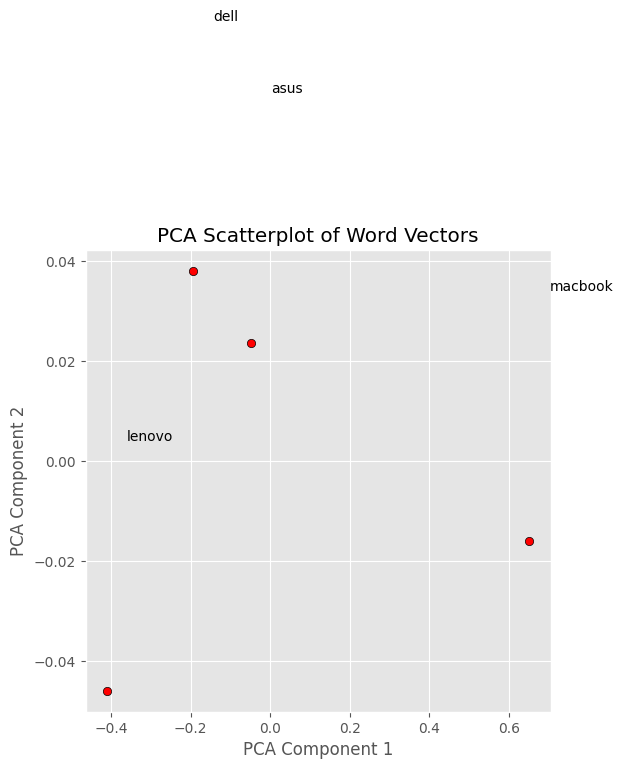

In [50]:
display_pca_scatterplot(model, ['lenovo', 'asus', 'dell', 'macbook'])